In [40]:
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from stepwise_regression import stepwise_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

<h3>Question 3</h3>

In [46]:
# importing the diabetes data from the excel file
diabetes = pd.read_excel("Diabetes_Data.xlsx")

In [47]:
# putting the explanatory variables in one dataframe
diabetes_explanatory_vars = diabetes.drop(columns = ["Y"])

In [48]:
# putting the dependent variable in its own dataframe
diabetes_dependent_var = diabetes[["Y"]]
diabetes_dependent_var

,Y
0,151
1,75
2,141
3,206
4,135
...,...
437,178
438,104
439,132
440,220


In [49]:
# calculating the correlation matrix of the explanatory variables
correlation_matrix_diabetes = diabetes_explanatory_vars.corr()

In [50]:
round(correlation_matrix_diabetes, 4)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
AGE,1.0000,0.1737,0.1851,0.3354,0.2601,0.2192,-0.0752,0.2038,0.2708,0.3017
SEX,0.1737,1.0000,0.0882,0.2410,0.0353,0.1426,-0.3791,0.3321,0.1499,0.2081
BMI,0.1851,0.0882,1.0000,0.3954,0.2498,0.2612,-0.3668,0.4138,0.4462,0.3887
BP,0.3354,0.2410,0.3954,1.0000,0.2425,0.1855,-0.1788,0.2577,0.3935,0.3904
S1,0.2601,0.0353,0.2498,0.2425,1.0000,0.8967,0.0515,0.5422,0.5155,0.3257
S2,0.2192,0.1426,0.2612,0.1855,0.8967,1.0000,-0.1965,0.6598,0.3184,0.2906
S3,-0.0752,-0.3791,-0.3668,-0.1788,0.0515,-0.1965,1.0000,-0.7385,-0.3986,-0.2737
S4,0.2038,0.3321,0.4138,0.2577,0.5422,0.6598,-0.7385,1.0000,0.6179,0.4172
S5,0.2708,0.1499,0.4462,0.3935,0.5155,0.3184,-0.3986,0.6179,1.0000,0.4647
S6,0.3017,0.2081,0.3887,0.3904,0.3257,0.2906,-0.2737,0.4172,0.4647,1.0000


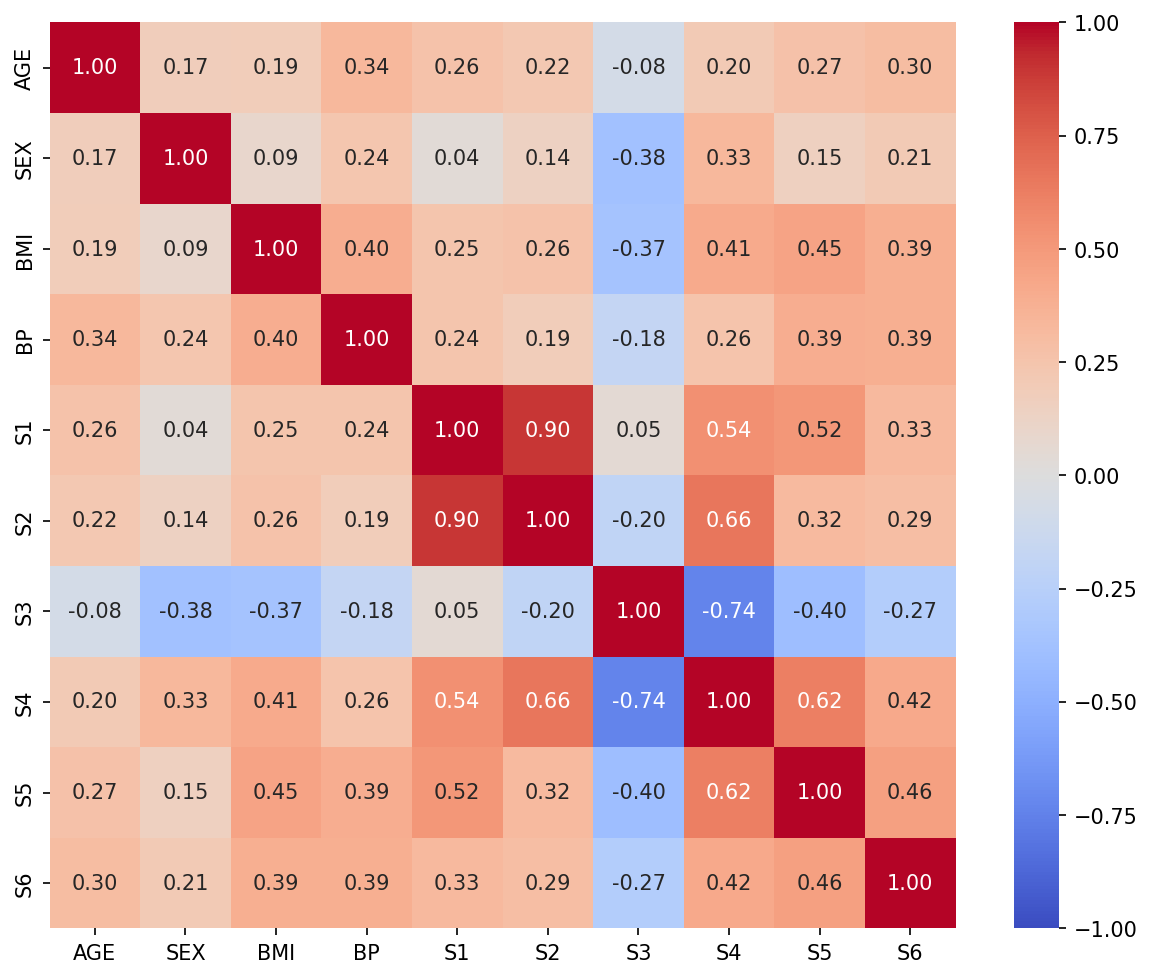

In [51]:
# create matplotlib figure and set font size
plt.figure(figsize=(10, 8),
          dpi = 150)
#sns.set(font_scale = 1)

# heatmap using sns, using coolwarm as the color map and rounding values to the nearest hundredth
sns.heatmap(correlation_matrix_diabetes,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            square = True,
            fmt = ".2f")

plt.show()

In [52]:
# function that takes in independent vars and a dependent var and fits it an OLS model to the data
def fit_OLS(X, y):
    
    X_with_constant = sm.add_constant(X)
    
    return sm.OLS(y, X_with_constant).fit()

In [53]:
# setting the explanatory vars and dependent var
X = diabetes_explanatory_vars
y = diabetes_dependent_var

# adding a constant to the independent vars
X_with_const = sm.add_constant(X)

# fitting the model using ordinary least sqaures
model1 = fit_OLS(X, y)

# using the model to predict the values to calculate the accuracy of the model
y_pred = model1.predict(X_with_const)

# mean squared error between actual and predicted values of the dependent var
mse = mean_squared_error(y, y_pred)

# adjusted r^2 values
adjusted_r2 = model1.rsquared_adj

# p-values of the different variables
p_values = pd.DataFrame(model1.pvalues, columns = ["p-value"])

# showing the values
print(mse, adjusted_r2)
print(p_values)

2859.6963475867506 0.5065592904853231
            p-value
const  1.016617e-06
AGE    8.670306e-01
SEX    1.041671e-04
BMI    4.296391e-14
BP     1.024278e-06
S1     5.794761e-02
S2     1.603902e-01
S3     6.347233e-01
S4     2.734587e-01
S5     1.555899e-05
S6     3.059895e-01


In [54]:
print(model1.summary())
print(model1.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           3.83e-62
Time:                        13:17:31   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

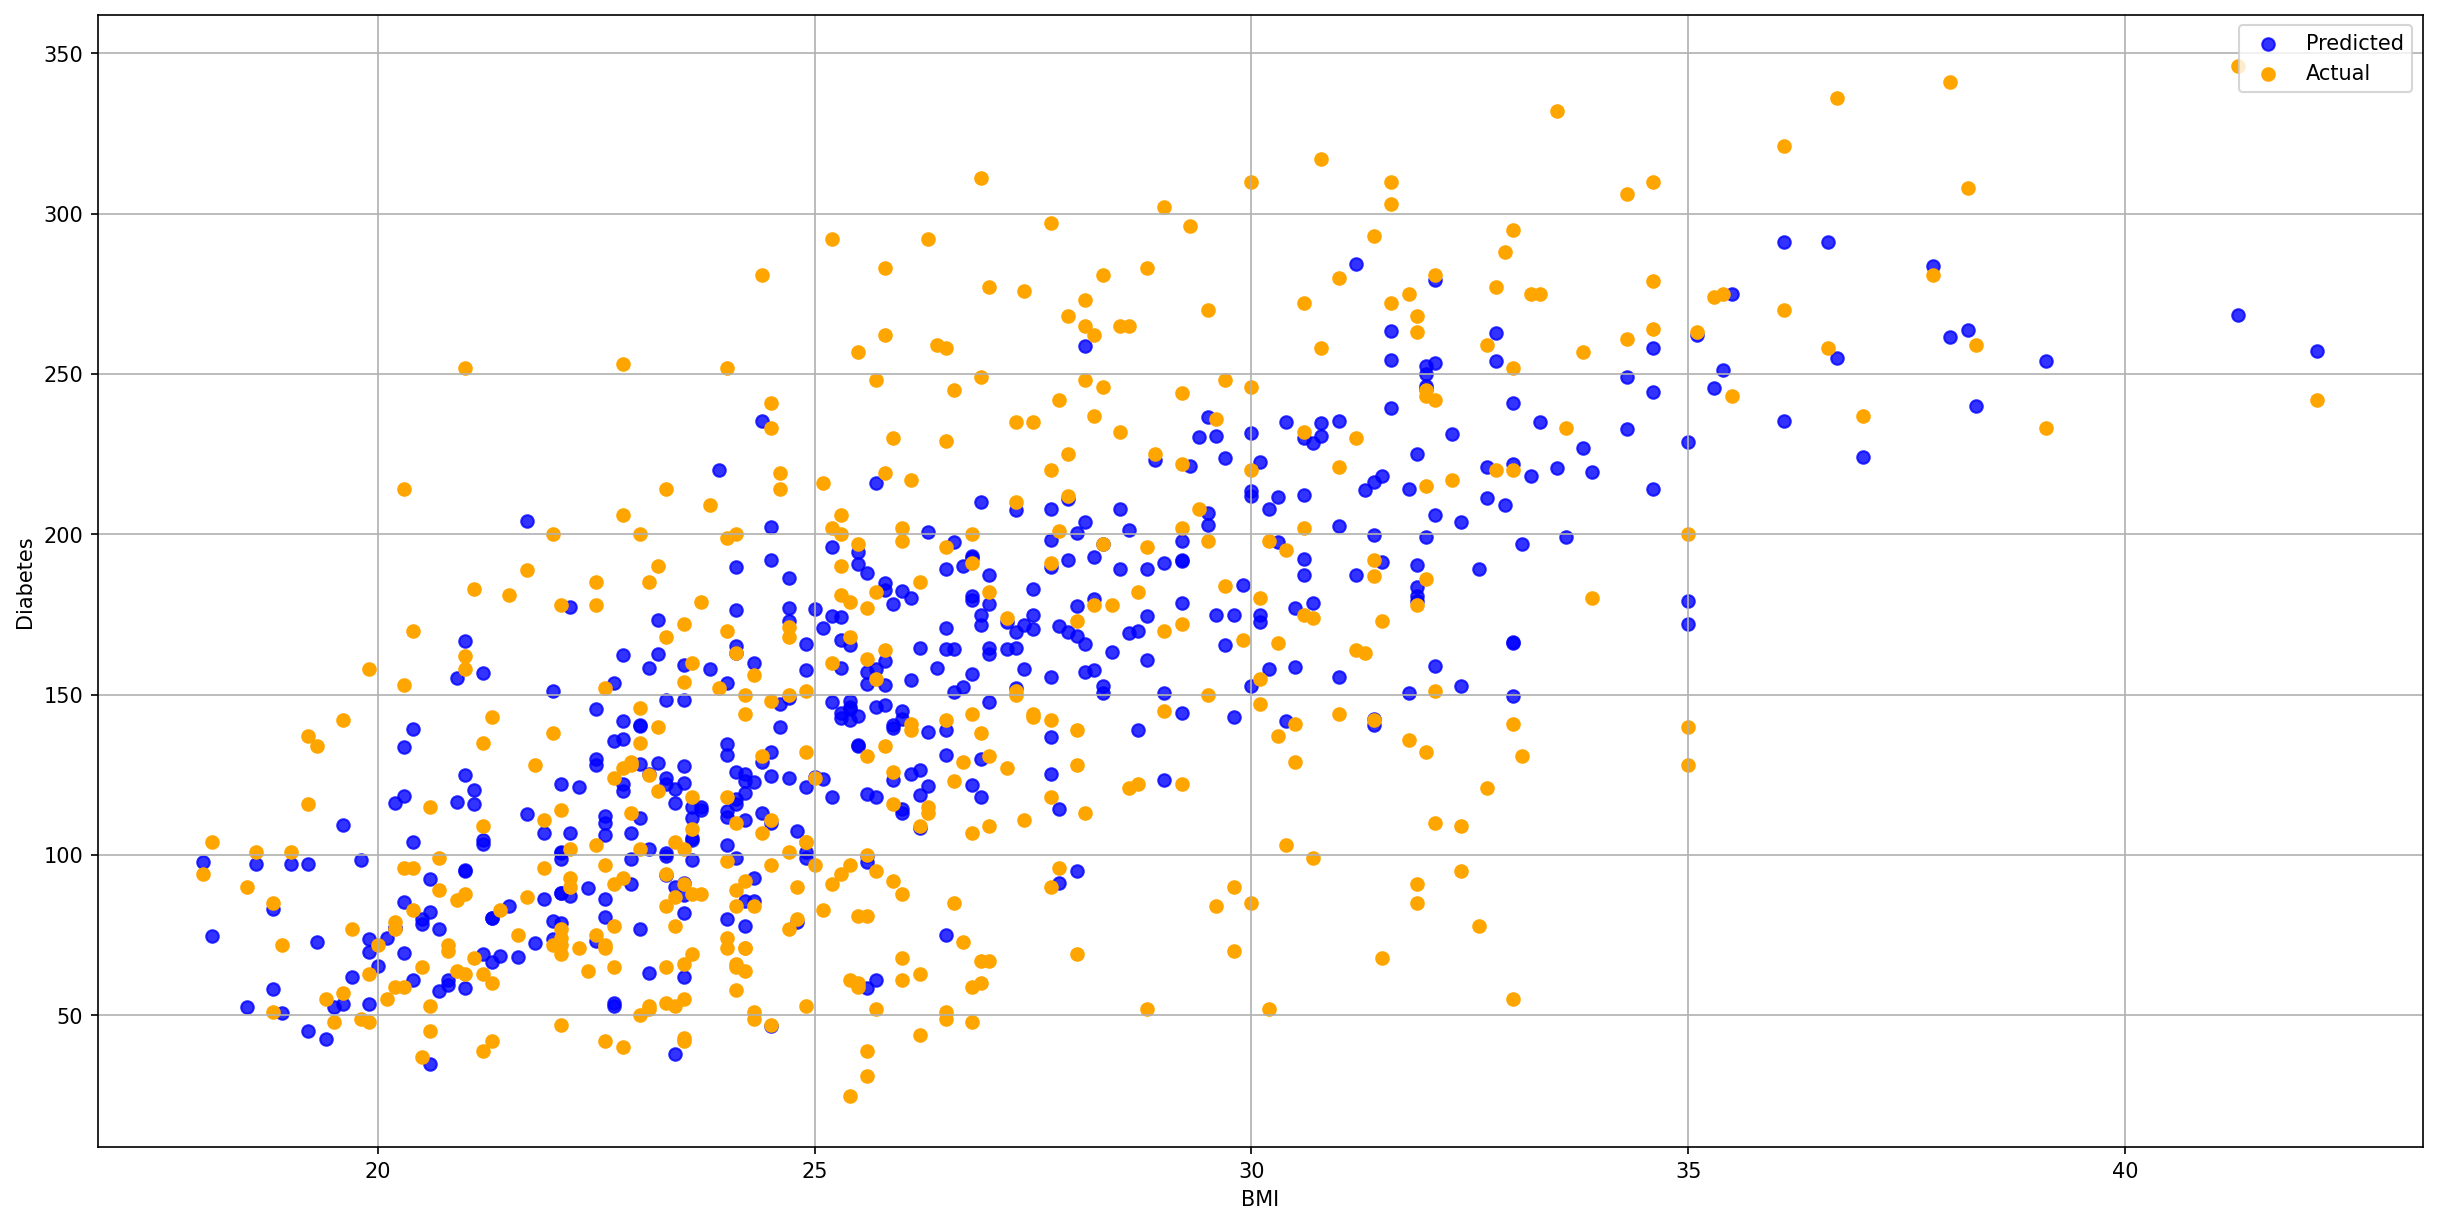

In [55]:
# setting figure size
plt.figure(figsize=(20, 10),
          dpi = 150)

# using the BMI as the x-axis and y_pred and y to graph the model
plt.scatter(X["BMI"], y_pred, color = "blue", label = "Predicted", alpha = 0.8)
plt.scatter(X["BMI"], y, color = "orange", label = "Actual")

# setting x and y labels
plt.xlabel("BMI")
plt.ylabel("Diabetes")

# showing legend and grid
plt.legend()
plt.grid(True)

plt.show()

In [56]:
help(stepwise_regression)

Help on module stepwise_regression.stepwise_regression in stepwise_regression:

NAME
    stepwise_regression.stepwise_regression

FUNCTIONS
    backward_regression(X, y, threshold_out, verbose=False)
    
    forward_regression(X, y, threshold_in, verbose=False)

FILE
    /opt/anaconda3/lib/python3.9/site-packages/stepwise_regression/stepwise_regression.py




In [57]:
X = diabetes.drop(columns=['Y'])
y = diabetes['Y']

# Perform stepwise regression

#X_with_constant = sm.add_constant(X)

selected_predictors = stepwise_regression.forward_regression(X, y, threshold_in = 0.05, verbose = True)

# View the summary of the final selected model
print(selected_predictors)

Add  BMI                            with p-value 3.46601e-42
Add  S3                             with p-value 5.05008e-16
Add  S5                             with p-value 6.04993e-07
Add  SEX                            with p-value 1.56983e-06
Add  BP                             with p-value 2.3086e-05
Add  S4                             with p-value 0.032584
['BMI', 'S3', 'S5', 'SEX', 'BP', 'S4']


In [58]:
model2 = fit_OLS(X[selected_predictors], y)

In [59]:
print(model2.summary())
print(model2.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     75.41
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.80e-64
Time:                        13:17:32   Log-Likelihood:                -2389.6
No. Observations:                 442   AIC:                             4793.
Df Residuals:                     435   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -210.1953     36.486     -5.761      0.0

In [60]:
X_with_const = sm.add_constant(X[selected_predictors])
y_pred = model2.predict(X_with_const)

In [61]:
mse = mean_squared_error(y, y_pred)

In [62]:
mse

np.float64(2906.6020141564777)

In [63]:
adjusted_r2 = model2.rsquared_adj

In [64]:
adjusted_r2

np.float64(0.5030775255087994)

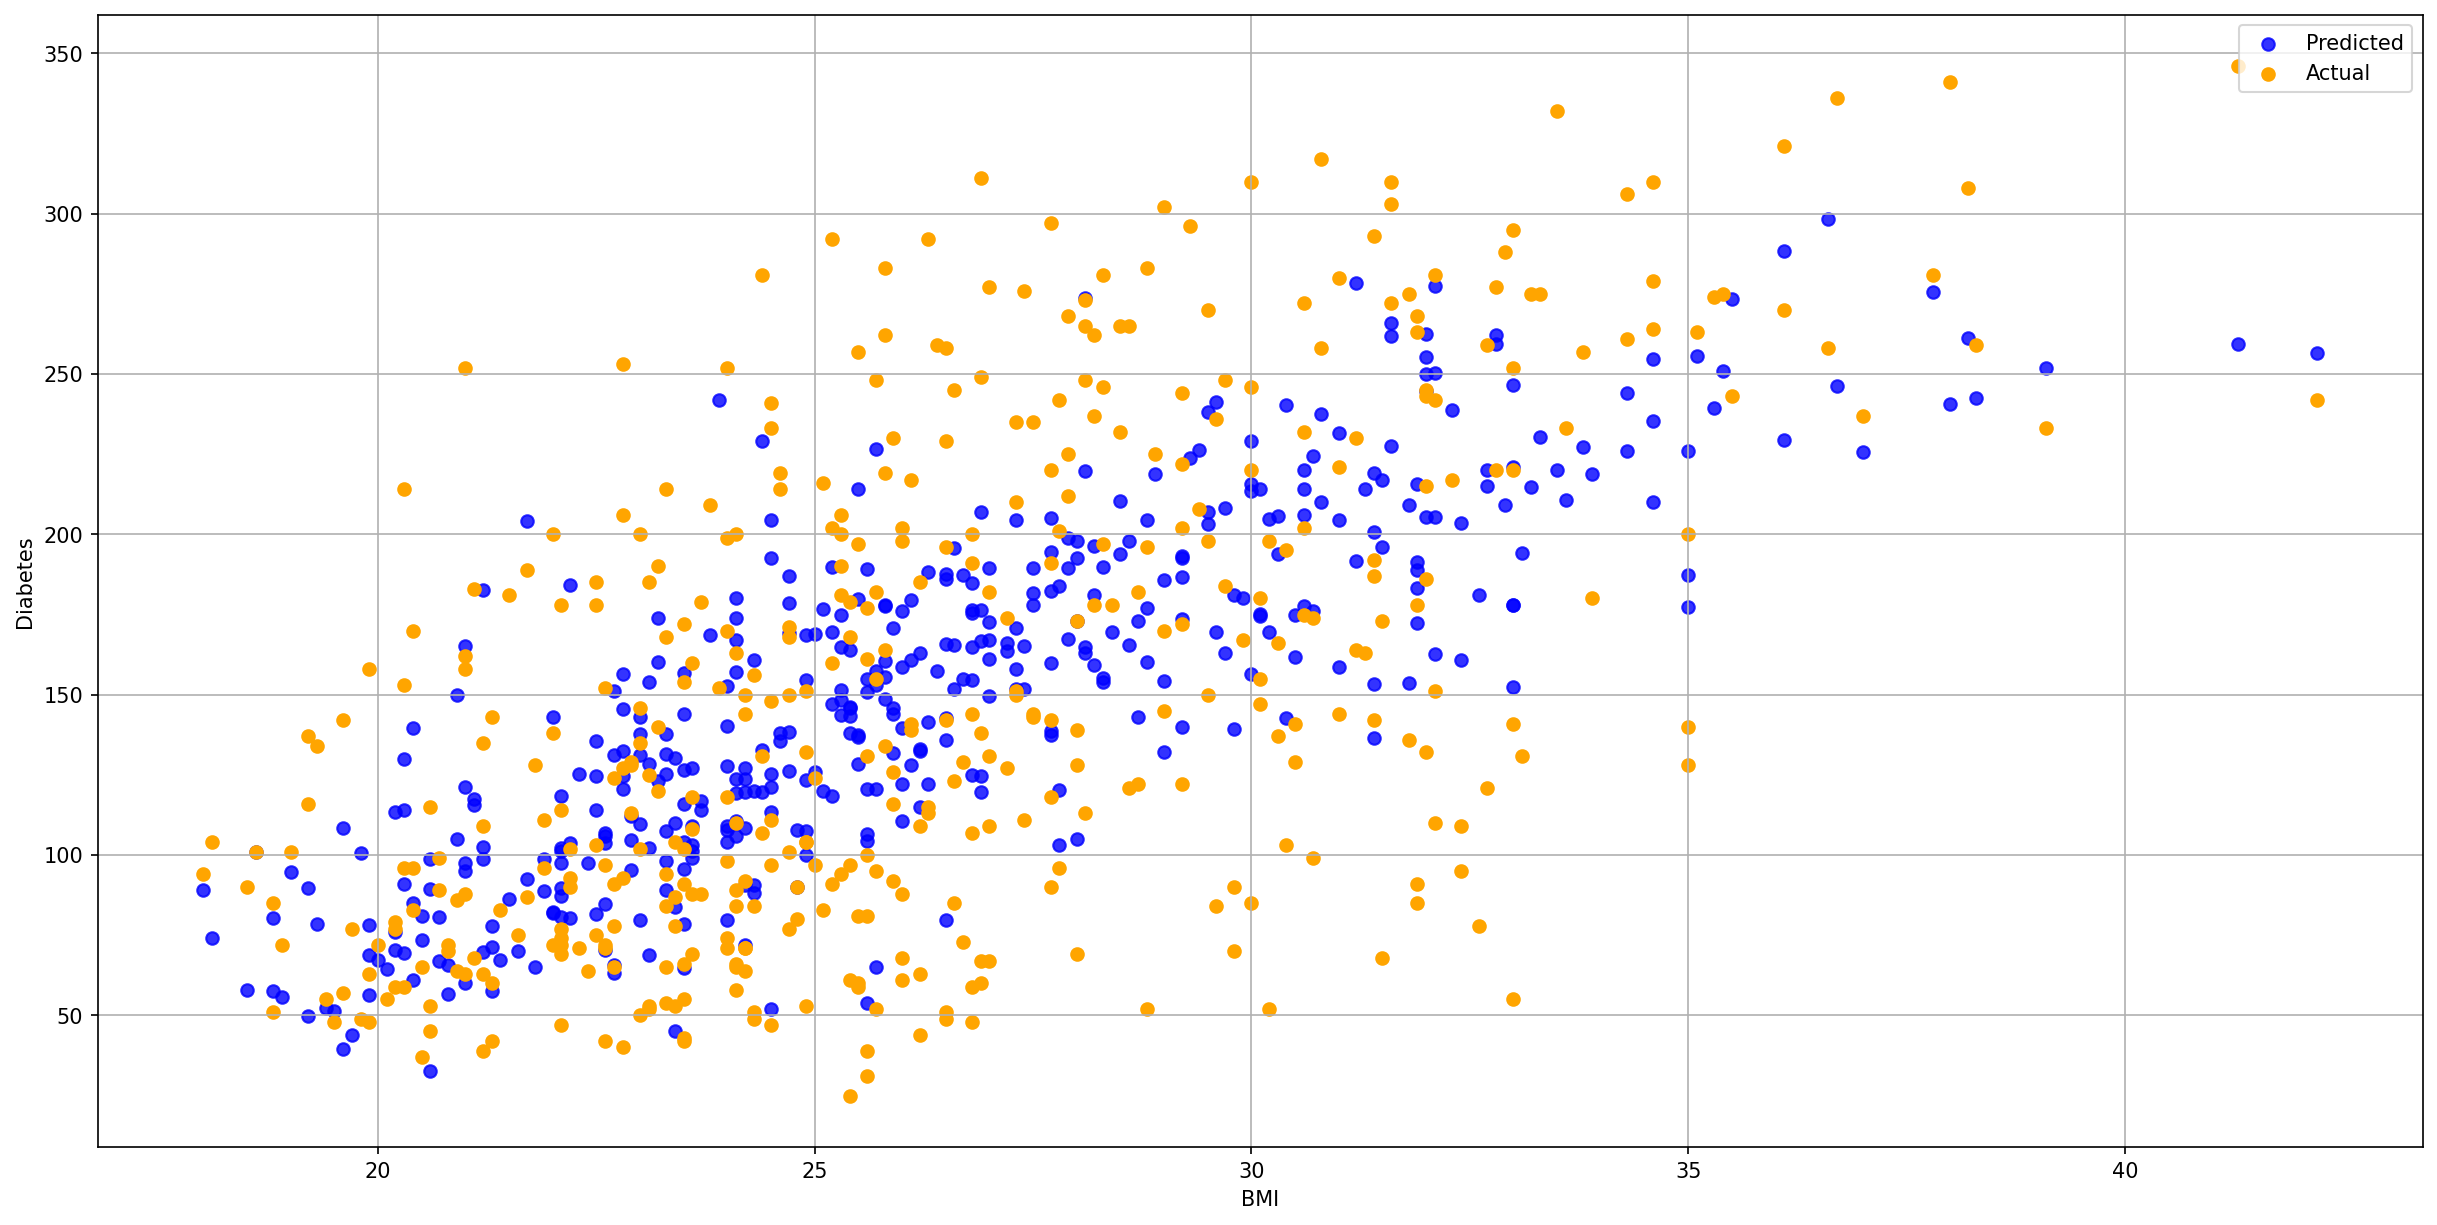

In [65]:
plt.figure(figsize=(20, 10),
          dpi = 150)


plt.scatter(X["BMI"], y_pred, color = "blue", label = "Predicted", alpha = 0.8)
plt.scatter(X["BMI"], y, color = "orange", label = "Actual")

plt.xlabel("BMI")
plt.ylabel("Diabetes")

plt.legend()
plt.grid(True)

plt.show()

<h3>Titanic</h3>

In [96]:
titanic = pd.read_csv("titanic3.csv")

In [97]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [98]:
# I can use mean directly because it will sum 1s and 0s and then divide by the length of the datapoints N
probability_of_survival = titanic["survived"].mean()

In [99]:
print(probability_of_survival)

0.3819709702062643


In [100]:
# defining age groups so that I can easily view the data rather than have a span of different ages
titanic['age_group'] = pd.cut(titanic['age'],
                              bins = [0, 5, 12, 18, 60, 1000],
                              labels = ["Infant", 'Child', 'Teen', 'Adult', 'Senior'])

# calculating the survival table using the titanic dataset. first group by their categories, then find how many
# survived, and then calcualte the mean (which is the same as survival in this case because deaths are 0) and
# unstack gives a pivot table
# https://stackoverflow.com/questions/69139030/why-and-when-should-use-a-stack-and-unstack-methods
survival_table = titanic.groupby(['pclass', 'sex', 'age_group'], observed = False)['survived'].mean().unstack() * 100

In [101]:
print(survival_table)

age_group          Infant       Child        Teen      Adult      Senior
pclass sex                                                              
1      female    0.000000         NaN  100.000000  97.368421   83.333333
       male    100.000000  100.000000   50.000000  35.937500    6.666667
2      female  100.000000  100.000000   87.500000  87.804878         NaN
       male    100.000000  100.000000    0.000000   8.396947   16.666667
3      female   65.000000   10.000000   60.714286  43.010753  100.000000
       male     35.294118   33.333333    8.108108  16.176471    0.000000


In [102]:
# change sex to numbers 1 and o for male and female respectively, making everything numerical
# I was getting some issues
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html
titanic["sex"] = titanic["sex"].map({"male" : 1, "female" : 0})

# removing values with NaNs in the rows
X = titanic[['sex', 'age', 'pclass']].dropna()

# adding constant to X (for regression)
X_with_constant = sm.add_constant(X)
# making sure that the the dependent variable dataset has the same length as y. should have dropped NaNs for the
# whole dataset, but it's fine for now
y = titanic[['survived']].loc[X.index].dropna()

In [103]:
# splitting data into train and test using 80% of the data for training and seeding the random to 42
# 42 seemed to be what everyone uses... so I went with it.
# stratify ensures that the sampling sizes are evened out (pclass, sex, and age) so that the training and testing
# is done on roughly similar data
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                   random_state = 42,
                                                   stratify = y)

In [104]:
# the logit function is similar to LogisticRegression() from scikitlearn, but the only difference is that
# Logit gives a range of probabilites, not just 0 or 1. However, to account for this, I later use > 0.5 to classify
# either 1 or 0. I also ran the regression on LogisticRegression() and got the same answers -> reproducible with
# scikitlearn. SEE FINAL SECTION FOR COMPARISON
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.486113
         Iterations 6


In [105]:
# predicting the values using X_test
y_pred = log_reg.predict(X_test)

In [106]:
# this is where the previous comment comes into play. the predicted values are a range of probabilities for the
# predicted values, which is conceptually wrong in this case, because people are either dead or alive (0 or 1).
# so, the next step takes care of that
print(y_pred)

372     0.255993
1203    0.074061
436     0.669411
43      0.782610
522     0.196748
          ...   
1112    0.740330
736     0.040247
753     0.128510
735     0.481556
1107    0.132364
Length: 210, dtype: float64


In [107]:
# any values above 0.5 are classified as 1, and values below 0.5 are classified as 0
y_pred_probability = (y_pred > 0.5).astype(int)

In [108]:
print(y_pred_probability)

372     0
1203    0
436     1
43      1
522     0
       ..
1112    1
736     0
753     0
735     0
1107    0
Length: 210, dtype: int64


In [109]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  836
Model:                          Logit   Df Residuals:                      832
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2810
Time:                        13:30:47   Log-Likelihood:                -406.39
converged:                       True   LL-Null:                       -565.21
Covariance Type:            nonrobust   LLR p-value:                 1.520e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4052      0.440     10.008      0.000       3.542       5.268
sex           -2.3162      0.181    -12.783      0.000      -2.671      -1.961
age           -0.0340      0.007     -4.895      0.0

In [110]:
# produces the confusion matrix between the actual and the predicted values
print(confusion_matrix(y_test, y_pred_probability))

[[107  17]
 [ 18  68]]


In [111]:
# calculates accuracy score of the model -> how many correct divided by the total number of datapoints (technically)
print(accuracy_score(y_test,y_pred_probability))

0.8333333333333334


In [112]:
print(log_reg.pvalues)

const     1.411933e-23
sex       2.037217e-37
age       9.827627e-07
pclass    3.995539e-19
dtype: float64


<h3>ScikitLearn Logistic Regression (For Comparison with Logit from Statsmodels)</h3>

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
log_reg_scikit = LogisticRegression()

In [116]:
log_reg_scikit.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [119]:
y_pred_scikit = log_reg_scikit.predict(X_test)

In [120]:
print(confusion_matrix(y_test, y_pred_scikit))

[[107  17]
 [ 18  68]]


In [121]:
print(accuracy_score(y_test,y_pred_scikit))

0.8333333333333334
